In [9]:
%pylab inline

import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [10]:
data = pd.read_csv('../log/connectionLog.csv', comment='#')

In [11]:
cuttedData = data[['time','type']]

In [12]:
maxTimeIteration = data.max()['time']

In [13]:
cuttedSingleData = cuttedData.loc[cuttedData['time'] ==  1]
cuttedSingleData['type'].shape[0]

565

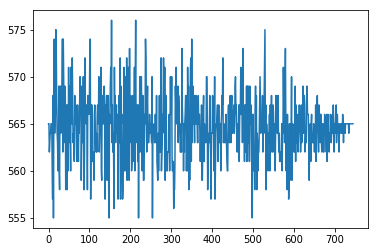

In [14]:
for i in range(maxTimeIteration):
    a = 0
    r = 0
    cuttedSingleData = cuttedData.loc[cuttedData['time'] ==  i]
    if i == 0:
        arr = np.zeros([1])
        continue
    if i == 1:
        init = cuttedSingleData['type'].shape[0]
        arr = np.append(arr, init)
        continue
    for i in cuttedSingleData['type']:
        if str(i) == 'u':
            continue
        elif str(i) == 'a':
            a = a + 1
        elif str(i) == 'r':
            r = r + 1
    somma = a - r
    arr = np.append(arr, init + somma)
    
arr = np.delete(arr, 0)
plot(arr)

c. ang 565.055267467
o. orig -0.00107589760675


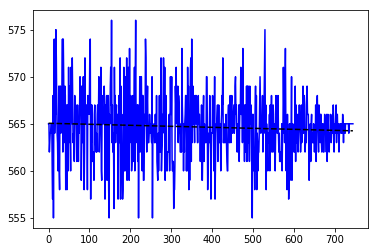

In [15]:
x = range(maxTimeIteration - 1)
fit = np.polyfit(x, arr, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.plot(x, arr, 'b', x, fit_fn(x), '--k')
print("c. ang", fit_fn[0])
print("o. orig", fit_fn[1])